In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# 1. Cargar el archivo CSV

data = pd.read_csv("weight-height.csv")

# Mostramos una muestra de los datos para verificar
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [3]:
# 2. Limpieza de datos (opcional)
# Eliminamos filas con valores nulos si las hay
data = data.dropna()

In [4]:
# Dividimos los datos en variables predictoras (Peso) y objetivo (Altura)
X = data[["Weight"]]  # Variable independiente (predictora)
y = data["Height"]  # Variable dependiente (objetivo)

# Dividimos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Entrenamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predecimos los valores
y_pred = modelo.predict(X_test)

In [7]:
# Coeficientes del modelo
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_


Ecuación de la línea de regresión: Precio = 0.11 * Tamaño_m2 + 48.46
  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


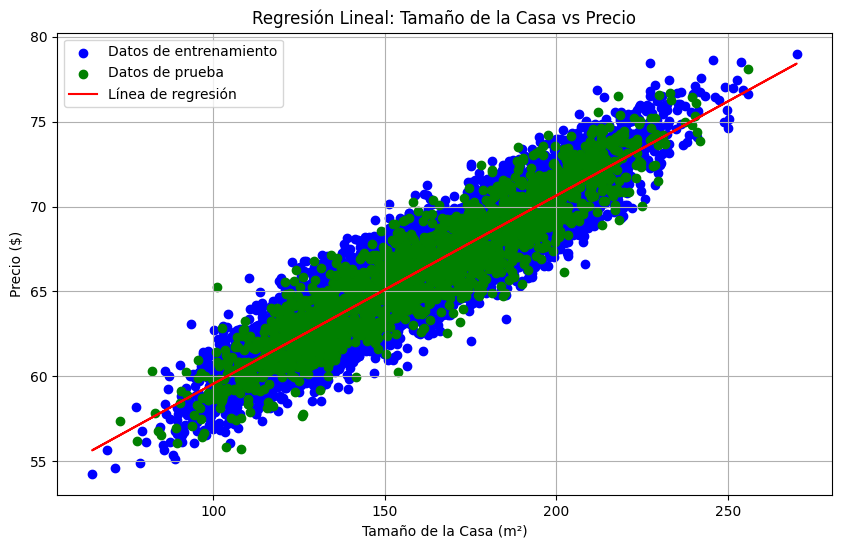

In [8]:

# Mostramos la ecuación del modelo
print(f"Ecuación de la línea de regresión: Precio = {pendiente:.2f} * Tamaño_m2 + {intercepto:.2f}")

# Opcional: Visualizamos los datos en formato tabular
print(data.head())

# Graficamos los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color="green", label="Datos de prueba")
plt.plot(X, modelo.predict(X), color="red", label="Línea de regresión")
plt.title("Regresión Lineal: Tamaño de la Casa vs Precio")
plt.xlabel("Tamaño de la Casa (m²)")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid()
plt.show()



In [9]:
# Calculamos las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos los resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Error Cuadrático Medio (MSE): 2.11
Error Absoluto Medio (MAE): 1.16
Coeficiente de Determinación (R²): 0.86


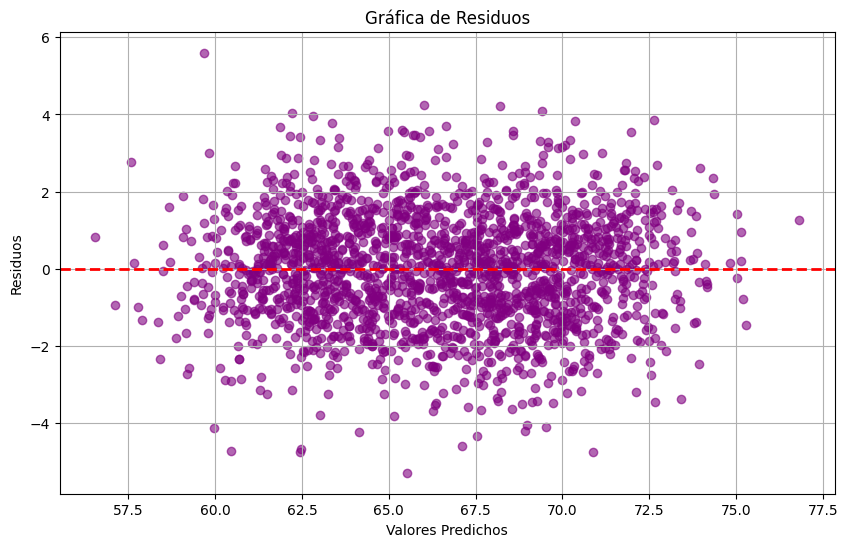

In [10]:
# Opcional: Gráfica de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color="purple", alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Gráfica de Residuos")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.grid()
plt.show()


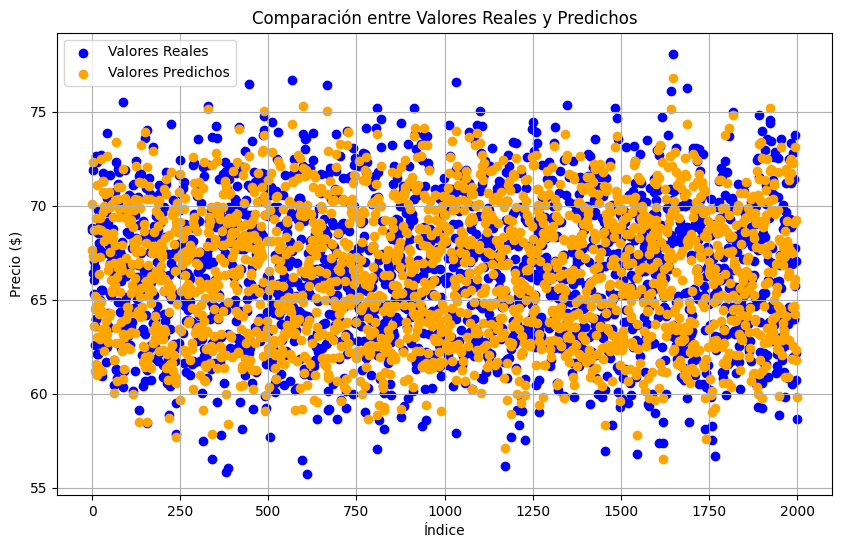

In [11]:
# Gráfica de comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Valores Reales")
plt.scatter(range(len(y_pred)), y_pred, color="orange", label="Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos")
plt.xlabel("Índice")
plt.ylabel("Precio ($)")
plt.legend()
plt.grid()
plt.show()

In [12]:
# Convertimos los datos a un problema binario
umbral = 30000  # Define un umbral para separar las clases
y_test_binario = (y_test > umbral).astype(int)
y_pred_proba = modelo.predict(X_test)  # Obtiene predicciones continuas


In [13]:
print("Distribución de clases en y_test_binario:")
print(y_test_binario.value_counts())

Distribución de clases en y_test_binario:
Height
0    2000
Name: count, dtype: int64


In [14]:
umbral = np.percentile(y_test, 50)  # Usa el percentil 50 como umbral (mediana)
y_test_binario = (y_test > umbral).astype(int)

In [15]:
# Verificar nuevamente la distribución
print("Distribución ajustada de clases en y_test_binario:")
print(y_test_binario.value_counts())


Distribución ajustada de clases en y_test_binario:
Height
1    1000
0    1000
Name: count, dtype: int64


In [16]:
y_pred_proba = modelo.predict(X_test)  # Predicciones continuas
fpr, tpr, thresholds = roc_curve(y_test_binario, y_pred_proba)
auc = roc_auc_score(y_test_binario, y_pred_proba)

# Mostramos el AUC
print(f"AUC-ROC: {auc:.2f}")

# Interpretación de la AUC-ROC:
# Alta AUC (> 0.9): El modelo discrimina bien entre las clases (alto vs bajo).
# Media AUC (0.7 - 0.9): Discriminación aceptable.
# Baja AUC (< 0.7): El modelo no discrimina bien.

AUC-ROC: 0.96


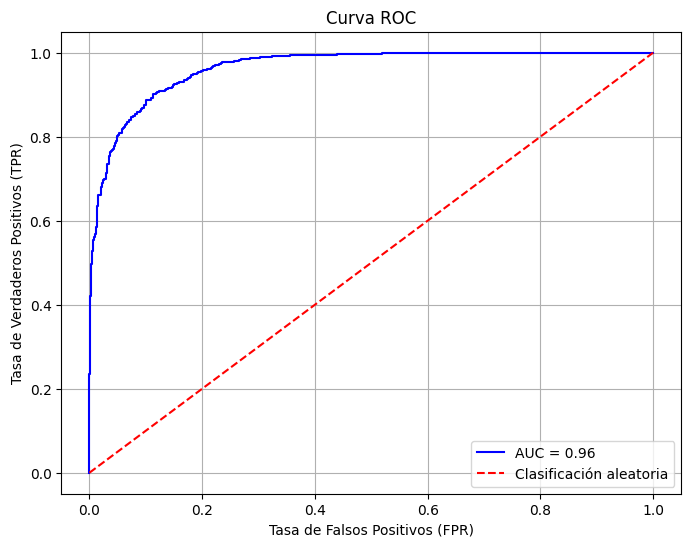

In [17]:
# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Clasificación aleatoria")
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid()
plt.show()
